License: Attribution 4.0 International (CC BY 4.0) 

In [1]:
from thinkbayes2 import Pmf, Suite
import thinkplot
import math

% matplotlib inline

# Twin brothers and bayes theorem

Suppose we are asked the question: <b>Elvis Presley had a twin brother who died at birth.  What is the probability that Elvis was an identical twin?</b>

In order to make our problem easier, we will clarify a few facts about identical twins. Identical twins are known as monozygotic twins, meaning that they both devolop from a single zygote. As a result, monozygotic twins are the same gender, either male-male or female-female. So, we rephrase our question: <b>What percentage of male-male twins are monozygotic.</b>

In addition, here is an important fact: .08% of twins are monozygotic.

## Without Bayes' theorem (counting)

We use a tree to visualize the problem.

<img src="treeReport1.jpg" alt="Probability Tree" height="400" width="400">

Assuming we have 100 twins, lets calculate the number of male-male dizygotic, male-male monozygotic, and total number of male-male twins. 

In [2]:
# calculate number of male-male dizygotic twins using the percentage of dizygotic and percentage of male-male
DiMM = 100 * .92 * .25

# calculate number of male-male monozygotic twins using the percentage of monozygotic and percentage of male-male
MoMM = 100 * .08 * .5

# calculate total number of male-male twins
TotalMM = DiMM + MoMM

print("Number of male-male dizygotic twins: {}".format(DiMM))
print("Number of male-male monozygotic twins: {}".format(MoMM))
print("Total number of male-male twins: {}".format(TotalMM))

Number of male-male dizygotic twins: 23.0
Number of male-male monozygotic twins: 4.0
Total number of male-male twins: 27.0


In [3]:
# next we can calculate the fraction of male-male twins that are monozygotic
fractionMoMM = MoMM / TotalMM
percentMoMM = fractionMoMM * 100
print("Percentage of male-male monozygotic twins: {0:.1f}%".format(percentMoMM))

Percentage of male-male monozygotic twins: 14.8%


So, we can conclude that Elvis had a 14.8% chance to identical twins with his brother.

## With Bayes' theorem (math)
However, rather than using a huge tree, we can use Bayes' theorem to make a much more eligant solution. First, assuming we are only dealing with twins, we find must find P(male-male|monozygotic), P(male-male), and P(monozygotic).  Then we can calculate P(monozygotic|male-male).

In [4]:
twins = dict()

# first calculate the total percentage of male-male twins. We can do this by adding the percentage of male-male
# monozygotic and the percentage of male-male dizygotic
twins['male-male'] = (.08*.50 + .92*.25)
twins['male-male|monozygotic'] = (.50)
twins['monozygotic'] = (.08)

print(twins['male-male'])
print(twins['male-male|monozygotic'])
print(twins['monozygotic'])

0.27
0.5
0.08


In [5]:
# now using bayes theorem
temp = twins['male-male|monozygotic'] * twins['monozygotic'] / twins['male-male']
print("P(monozygotic|male-male): {0:.3f}".format(temp))

P(monozygotic|male-male): 0.148


# The Dice Problem chapter 3

We are given dice 4, 6, 8, 12, and 20 sides.  If we roll a a die many times at random, what is the probability that we roll each die.

First we must define the Likelihood function for the dice.  In this case, if we roll a number greater than that dice (roll 5 for 4 sided dice), the probability of that being the chosen dice goes to zero.  Else, the probability is multiplied by 1 over the number of sides.

In [6]:
class Dice(Suite):
    def Likelihood(self, data, hypo):
        if hypo < data:
            return 0
        else:
            return 1 / hypo

Next create a dice object with dice of 4, 6, 8, 12 and 20 sides

In [7]:
suite = Dice([4, 6, 8, 12, 20])

Roll a 6 and see the probabilities of being each dice

In [8]:
suite.Update(6)
suite.Print()

4 0.0
6 0.3921568627450979
8 0.2941176470588235
12 0.19607843137254896
20 0.11764705882352941


Now roll a series of numbers

In [9]:
for roll in [6, 8, 7, 7, 5, 4]:
    suite.Update(roll)

suite.Print()

4 0.0
6 0.0
8 0.9432484536722127
12 0.055206128061290875
20 0.001545418266496554


For these roles, we see that the 8 sided dice is most probable.  It is still possible for the 20 sided dice, but only with a .1% chance.

# The Train Problem chapter 3

Railroads number trains from 1 to N.  One day you see a train numbered 60.  How many trains does the railroad have?

First define the Train suite.  The likelihood is the same as the above dice problem.  We can think of it like this: each number correspond to a number of trains.  If we see train N, then all hypothesis less than N are 0.  Else, they are 1 / N.

In [10]:
class Train(Suite):
    # hypo is the number of trains
    # data is an observed serial number
    def Likelihood(self, data, hypo):
        if data > hypo:
            return 0
        else:
            return 1 / hypo

Create train object and update with train number 60

In [11]:
hypos = range(1, 1001)
train = Train(hypos)
train.Update(60)

0.0028222671142652746

Plot current probabilities of numbers of trains

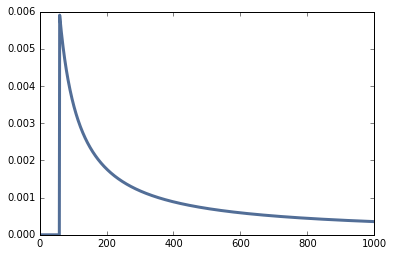

In [12]:
thinkplot.Pdf(train)

Because 60 is not actually a good guess, we will compute the mean of the posterior distribution

In [13]:
def Mean(suite):
    total = 0
    for hypo, prob in suite.Items():
        total += hypo * prob
    return total

print(Mean(train))

333.41989326371095


The mean of the posterior distribution is the value that minimizes error. In simpler terms, we get the smallest number (error) when we subtract the actual number of trains from the mean of posterior distribution.

Next, update the train with two more sightings, 50 and 90

164.3055864227336


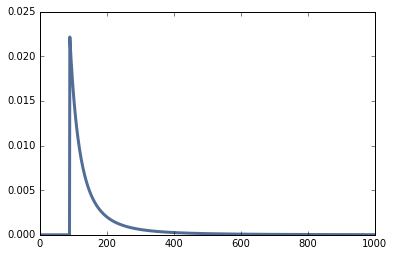

In [14]:
for data in [50, 90]:
    train.Update(data)
print(Mean(train))
thinkplot.Pdf(train)

After the two updates, the error minimizing value has gone down to 164.

At the start of the problem, we assumed that there was an equal chance to any number of trains.  However, most rail companies don't have thousands of trains.  To better represent this fact, we can give each hypotheses greater for smaller numbers of trains.

In [15]:
class Train2(Dice):
    def __init__(self, hypos, alpha=1.0):
        Pmf.__init__(self)
        for hypo in hypos:
            self.Set(hypo, hypo**(-alpha))
        self.Normalize()

In [16]:
hypos2 = range(1, 1001)
train2 = Train2(hypos2)

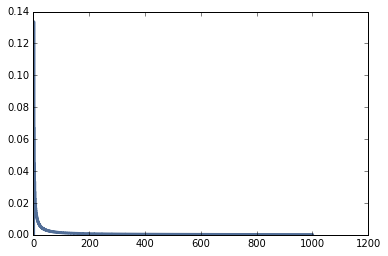

In [17]:
thinkplot.Pmf(train2)

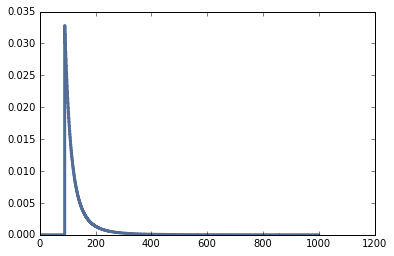

In [18]:
for data in [50, 60, 90]:
    train2.Update(data)
    
thinkplot.Pmf(train2)

We initally thought that givin lower number of trains higher probabilities would give us a more accurate result.  However, over just a few data points, we get a nearly identical graph to the one with linearly represented hypotheses.

# Original Bayes Problem - Two Watches

Suppose you are a student who goes to various classes. Every morning you wake up and put on one of two watches. The first watch is on time. The second watch is 5 minutes slow. If you arrive to class 3 minutes late, what is the probability you wore the slow watch. Assume that arrival times follow the Gaussian function where b is an offset in minutes:
$$f(x) = e^{-\frac{(x-b)^2}{32}}$$

First we want to make sure that our gaussian function is a reasonable approximation of arrival time. Below is a plot of the function from 15 minutes late to 15 minutes early. With some quick looks at the graph, you can see that you arrive to class +- 2 minutes around 45% of the time which is reasonable most students.

<img src="gaussianFunctions.svg" alt="Gaussian Function" height="600" width="600">

Next we define our Watch Suite.  Our hypotheses will be the watches described above:
'watch 1' is that you used the on time watch
'watch 2' is that you used the 5 minute slow watch

In [19]:
class Watch(Suite):
    """
    Maps watch hypotheses to probabilities
    """
    
    def f(x, b):
        """
        f is a function that returns a Gaussian Function.
        
        Args:
            x (int): the primary variable
            b (int): a constant offset used to make fast or slow clocks
        """
        return math.exp((-1 * (x-b)**2) / (32))
    
    watch1_probs = dict()
    for i in range(-15,15):
        watch1_probs[i] = f(i, 0)

    watch2_probs = dict()
    for i in range(-15,15):
        watch2_probs[i] = f(i, -5)
        
    hypotheses = {
        'watch 1':watch1_probs,
        'watch 2':watch2_probs
        }
    
    def __init__(self, hypos):
        Pmf.__init__(self)
        for hypo in hypos:
            self.Set(hypo, 1)
        self.Normalize()
        
    def Likelihood(self, data, hypo):
        time = self.hypotheses[hypo]
        like = time[data]
        return like

Next create the two hypotheses. As expected, before we see any class arival data, both watches have equal chances of being worn.

In [20]:
watches = Watch(['watch 1', 'watch 2'])
watches.Print()

watch 1 0.5
watch 2 0.5


As a sanity check, suppose we arrive to class exactly on time, and the next 5 minutes late

In [21]:
for arrival_time in [0,-5]:
    watches.Update(arrival_time)
watches.Print()

watch 1 0.5
watch 2 0.5


Our model says that both hypotheses have still have the same probabilility, this makes sense because one hypotheses is centered at 0 and the other at 5.

Now, lets see what happens if we visit 5 more classes

In [22]:
for arrival_time in [0,-2,-2,-3,-5]:
    watches.Update(arrival_time)
    
watches.Print()

watch 1 0.538983220687684
watch 2 0.461016779312316


After this series of updates, we have a slightly increased chance of using the on time watch.  This makes sense because on average, the times have been slightly closer to 0 than -5.  

Even though our model performs reasonable close data, it falls apart if you arrive either really late or early.  Suppose you arrive to class 11 minutes late

In [23]:
watches.Update(-11)
watches.Print()

watch 1 0.07585818002124352
watch 2 0.9241418199787564


Now, the slow watch, is significantly more probable than the on time watch. If we didn't want extreme values to have as big of an impact in updates, we would simply modify the denominator of our Gaussian function